In [1]:
import numpy as np
#pip install pysindy
import pysindy as psd
from data_loader import data_loader_noH
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train, dx_train, x_val, dx_val = data_loader_noH()

In [3]:
library = psd.PolynomialLibrary(degree=2)
model = psd.SINDy(optimizer=psd.STLSQ(threshold=0.01), feature_library=library)

In [4]:
model.fit(x_train, t = 1, x_dot=dx_train)

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=PolynomialLibrary(),
      feature_names=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'],
      optimizer=STLSQ(threshold=0.01))

In [5]:
model.print()

(x0)' = -0.071 1 + 0.211 x0 + -0.153 x1 + -0.062 x3 + -0.032 x4 + 0.177 x5 + -0.097 x6 + -0.056 x0^2 + 0.281 x0 x1 + -0.074 x0 x2 + -0.072 x0 x3 + -0.047 x0 x4 + -0.107 x0 x5 + 0.134 x0 x6 + -0.426 x1^2 + 0.415 x1 x2 + 0.046 x1 x4 + 0.250 x1 x5 + -0.177 x1 x6 + -0.127 x2^2 + 0.046 x2 x3 + -0.023 x2 x4 + -0.134 x2 x5 + 0.067 x2 x6 + 0.044 x3^2 + -0.155 x3 x4 + 0.087 x3 x5 + 0.019 x3 x6 + 0.092 x4^2 + 0.039 x4 x5 + -0.095 x4 x6 + -0.133 x5^2 + 0.133 x5 x6 + -0.023 x6^2
(x1)' = -0.063 1 + 0.235 x0 + -0.137 x1 + -0.026 x2 + -0.059 x3 + -0.032 x4 + 0.136 x5 + -0.065 x6 + -0.091 x0^2 + 0.284 x0 x1 + -0.013 x0 x2 + -0.122 x0 x3 + -0.102 x0 x5 + 0.106 x0 x6 + -0.348 x1^2 + 0.247 x1 x2 + 0.038 x1 x3 + 0.055 x1 x4 + 0.195 x1 x5 + -0.125 x1 x6 + -0.067 x2^2 + 0.049 x2 x3 + -0.058 x2 x4 + -0.093 x2 x5 + 0.039 x2 x6 + 0.065 x3^2 + -0.171 x3 x4 + 0.030 x3 x5 + 0.065 x3 x6 + 0.096 x4^2 + 0.047 x4 x5 + -0.105 x4 x6 + -0.072 x5^2 + 0.038 x5 x6 + 0.017 x6^2
(x2)' = -0.062 1 + 0.285 x0 + -0.199 x1 + -0.0

In [6]:
theta = np.array(library.transform(x_val))
sindy_coeff = np.transpose(model.coefficients())
dx_predict = np.matmul(theta, sindy_coeff)

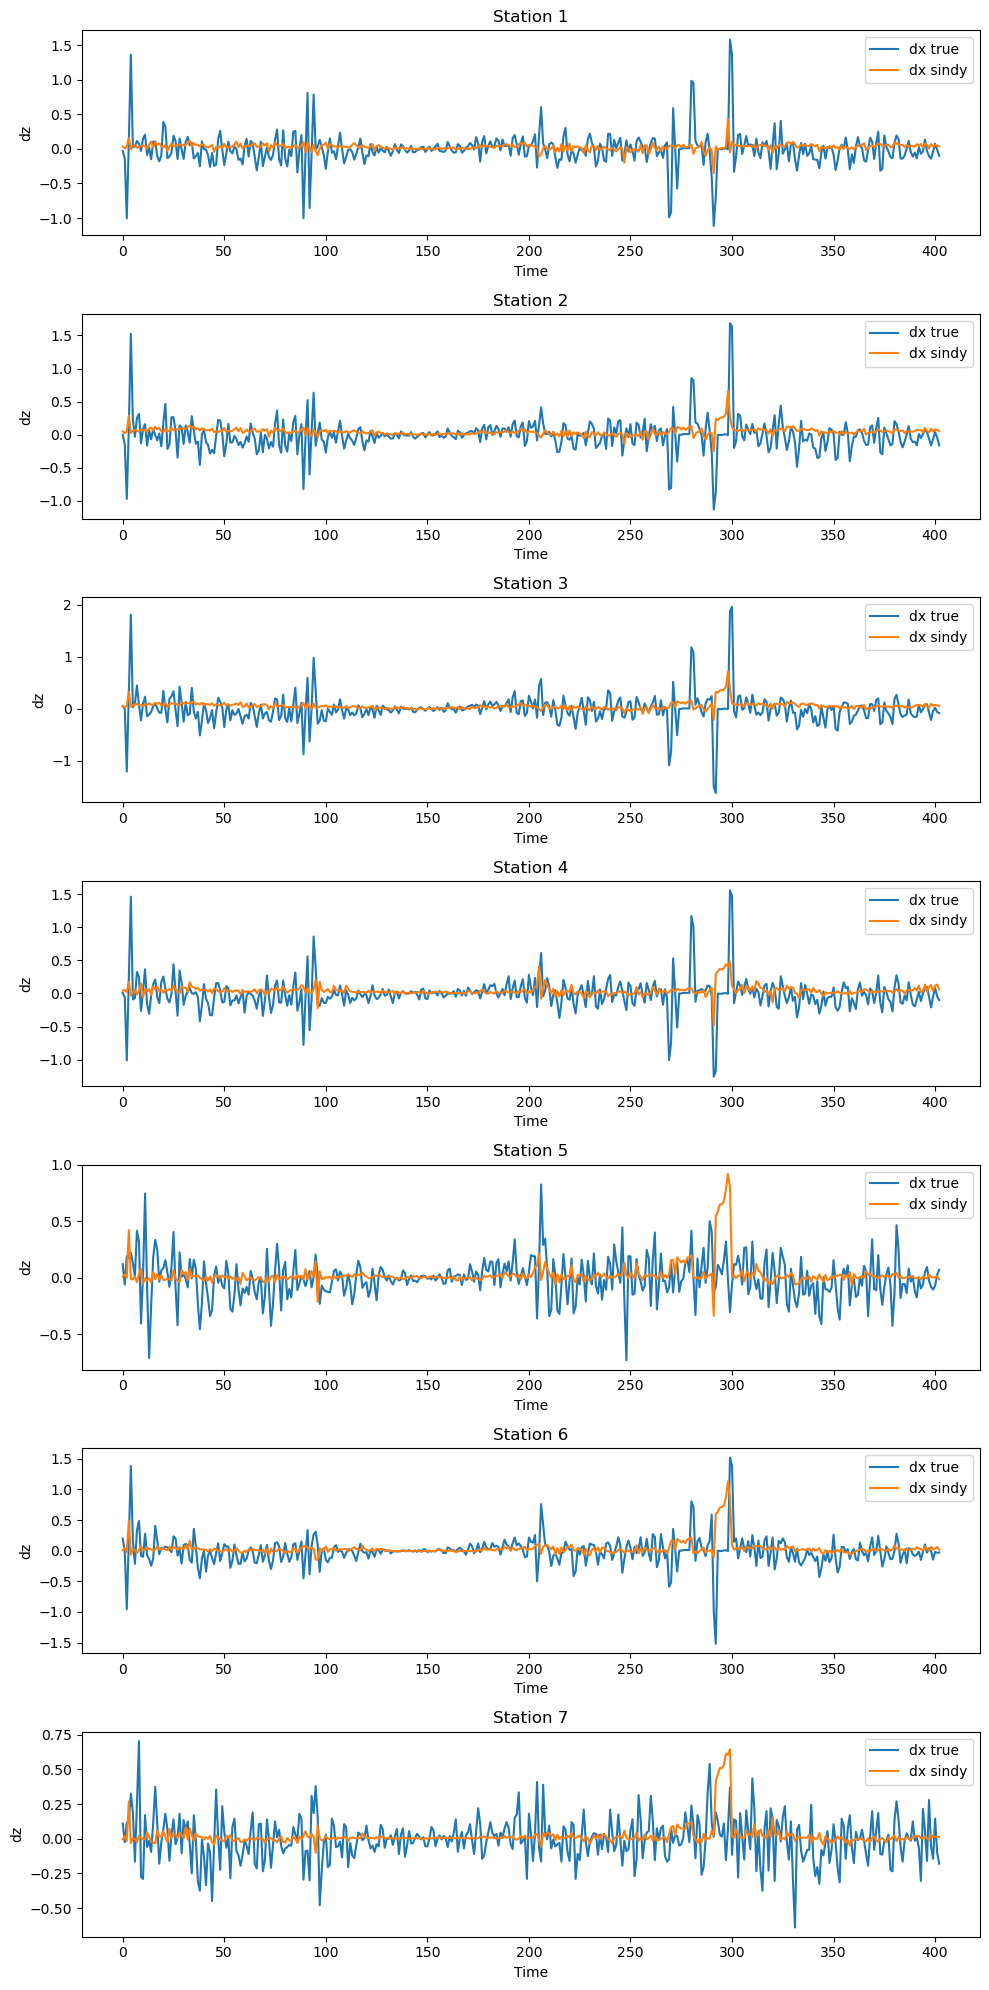

In [7]:
fig, axs = plt.subplots(nrows=dx_val.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(dx_val.shape[1]):
    axs[i].plot(dx_val[:, i], label = 'dx true')
    axs[i].plot(dx_predict[:,i], label = 'dx sindy')
    axs[i].legend()

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('dz')

# Show the figure
plt.tight_layout()
plt.show()

In [14]:
#Simulate data with discovered governing equations
total_sim_timestep = 400
total_pred_step = 10
s = (total_sim_timestep, 7)
sim_result = np.zeros(s)

In [15]:
for t in range(0,total_sim_timestep,total_pred_step):
    x_init = x_val[t,:].reshape(1,-1)
    for s in range(total_pred_step):
        Theta_curr = np.array(library.transform(x_init))
        dx_curr = np.matmul(Theta_curr, sindy_coeff)
        x_new = x_init + dx_curr
        sim_result[t+s,:] = x_init
        x_init = np.array(x_new)

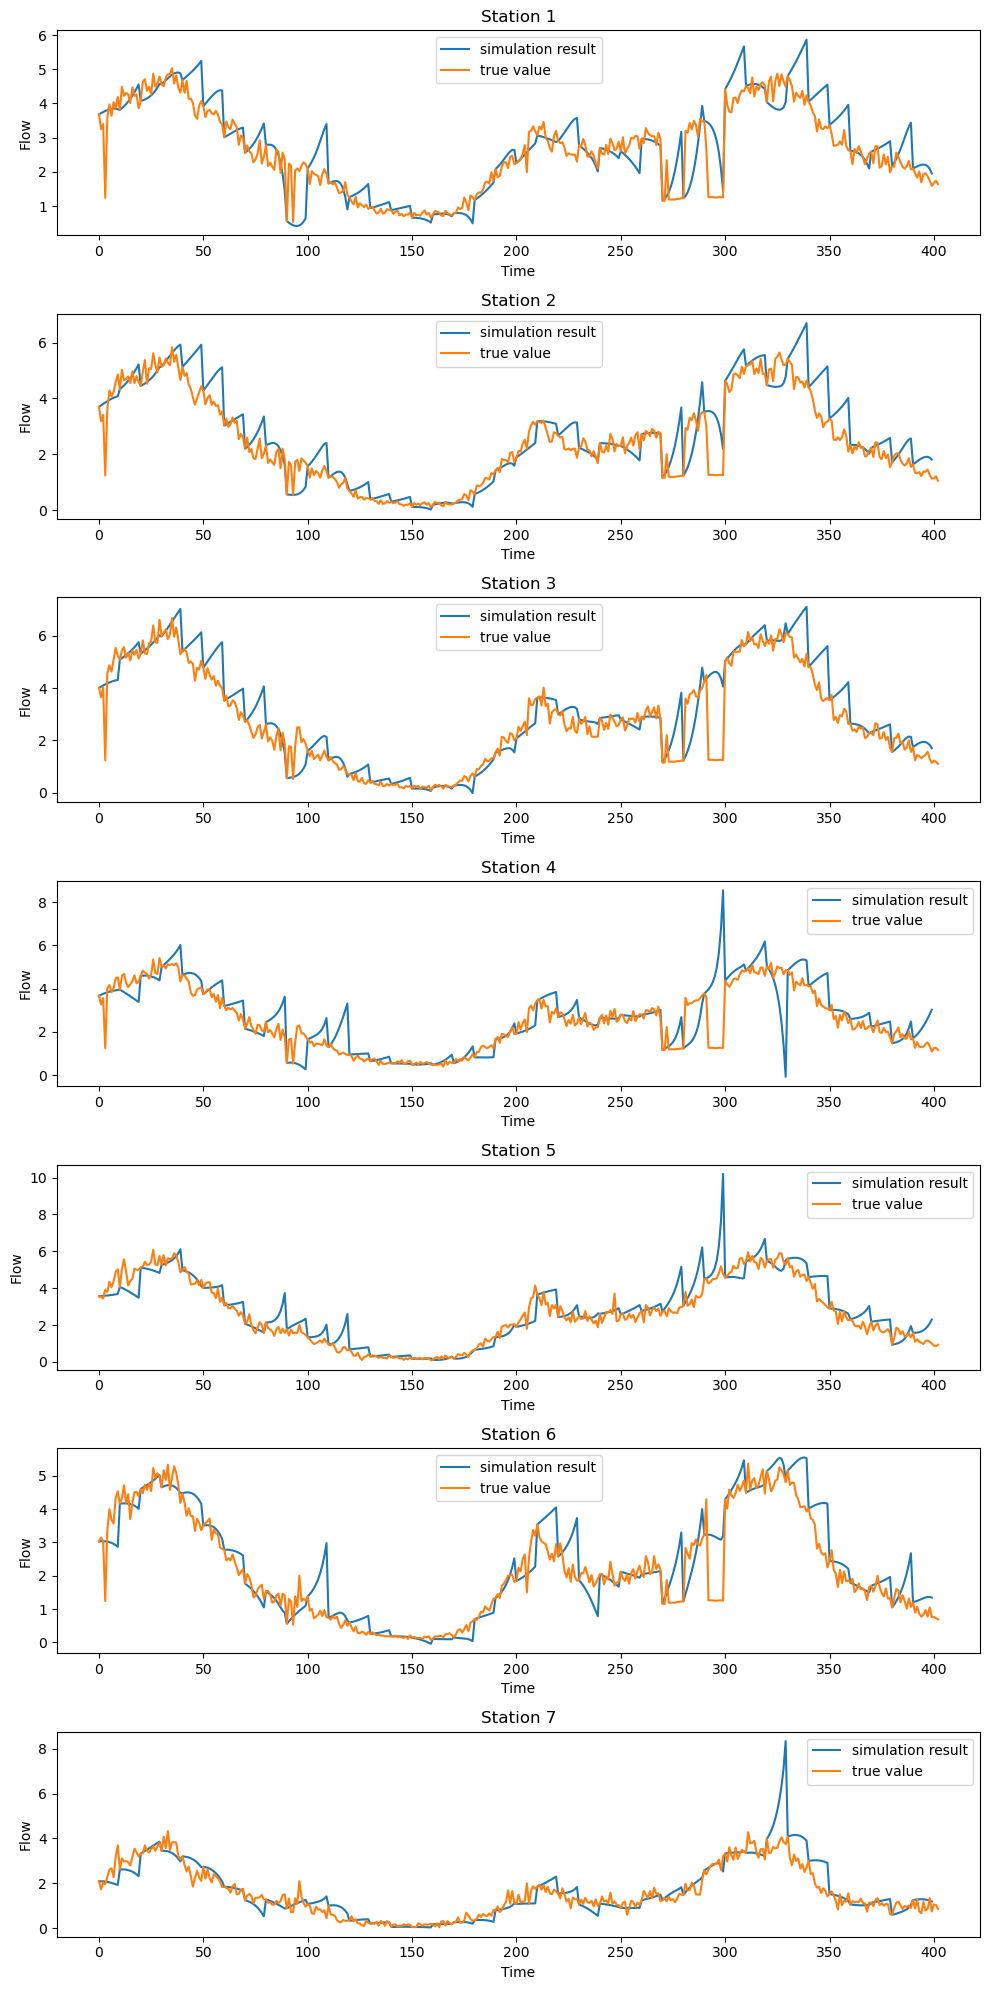

In [16]:
fig, axs = plt.subplots(nrows=x_val.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(x_val.shape[1]):
    axs[i].plot(sim_result[:, i], label = "simulation result")
    axs[i].plot(x_val[:,i], label = "true value")
    axs[i].legend()

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow')

# Show the figure
plt.tight_layout()
plt.show()